# Solving the Burgers Equation

In [1]:
import pandas as pd
import numpy as np
import sciann as sn
import tensorflow as tf
from sciann.utils.math import diff, tanh, sin

---------------------- SCIANN 0.6.0.4 ---------------------- 
For details, check out our review paper and the documentation at: 
 +  "https://arxiv.org/abs/2005.08803", 
 +  "https://www.sciann.com". 



## Defining the Inputs and Building the NN

In [2]:
# Variable defines the inputs
t = sn.Variable("t")
x = sn.Variable("x")

# Functional creates the deep neural net
# This will create a deep neural network with 8 layers with 20 neurons in each layer with a tanh activation

u = sn.Functional("u", [t, x], 8*[20], "tanh")

## Setting up the Optimization Problem

In [3]:
# L1 is the PDE
L1 = diff(u, t) + u*diff(u, x) - (0.01/np.pi)*diff(u, x, order=2)

# Boundary Conditions
# Tmin = t + tol
tol = 0.001 
L2 = (1 - tanh(t - tol)) * (u + sin(np.pi*x))
L3 = (1 - tanh(x - (-1+tol))) * u
L4 = (1 + tanh(x - (1-tol))) * u

## Building the PINN

In [4]:
m = sn.SciModel(
    [t, x], 
    [L1, L2, L3, L4], 
    "mse", "Adam")

## Define Sampling Grid

In [5]:
x_data, t_data = np.meshgrid(
    np.linspace(-1, 1, 200),
    np.linspace(0, 1, 200))

## Training

In [6]:
callback = tf.keras.callbacks.EarlyStopping(patience=3)

m.train(
    [x_data, t_data],
    4*['zero'],
    learning_rate = 0.003,
    epochs = 9000,
    batch_size = 500,
    callbacks = [callback],
    verbose = 0)

## Testing

In [10]:
x_test, t_test = np.meshgrid(
    np.linspace(-1, 1, 100),
    np. linspace(0, 1, 100))

u_pred = u.eval(m, [x_test, t_test])

## Graphing Results

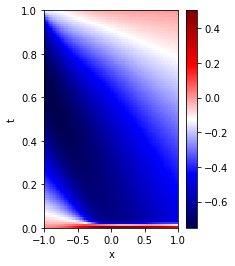

In [11]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (3,4))
plt.pcolor(x_test, t_test, u_pred, cmap='seismic')
plt.xlabel('x')
plt.ylabel('t')
plt.colorbar()